In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('data.csv')
Data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.0,19.0,3916.0,46135.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28.0,19.0,3916.0,40650.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28.0,20.0,3916.0,36350.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28.0,18.0,3916.0,29450.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28.0,18.0,3916.0,34500.0


In [3]:
Data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8436.000000,8372.000000,8426.000000,8429.000000,8435.000000,8435.000000,8435.000000,8.435000e+03
mean,2010.250474,248.086718,5.552219,3.389251,27.310492,20.202608,1596.729342,4.165557e+04
std,7.664573,110.761633,1.797906,0.908215,9.474889,9.530779,1513.180682,5.701487e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2006.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2014.000000,217.000000,6.000000,4.000000,26.000000,19.000000,1385.000000,2.949500e+04
75%,2016.000000,300.000000,6.000000,4.000000,31.000000,23.000000,2009.000000,4.243000e+04
max,2017.000000,750.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,1.382750e+06


In [4]:
Data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              64
Engine Cylinders       10
Transmission Type       0
Driven_Wheels           1
Number of Doors         7
Market Category      2519
Vehicle Size            1
Vehicle Style           1
highway MPG             1
city mpg                1
Popularity              1
MSRP                    1
dtype: int64

In [5]:
Data.columns[:]

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8436 entries, 0 to 8435
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8436 non-null   object 
 1   Model              8436 non-null   object 
 2   Year               8436 non-null   int64  
 3   Engine Fuel Type   8436 non-null   object 
 4   Engine HP          8372 non-null   float64
 5   Engine Cylinders   8426 non-null   float64
 6   Transmission Type  8436 non-null   object 
 7   Driven_Wheels      8435 non-null   object 
 8   Number of Doors    8429 non-null   float64
 9   Market Category    5917 non-null   object 
 10  Vehicle Size       8435 non-null   object 
 11  Vehicle Style      8435 non-null   object 
 12  highway MPG        8435 non-null   float64
 13  city mpg           8435 non-null   float64
 14  Popularity         8435 non-null   float64
 15  MSRP               8435 non-null   float64
dtypes: float64(7), int64(1),

In [7]:
from sklearn import preprocessing
Le_Make=preprocessing.LabelEncoder()
Le_Model=preprocessing.LabelEncoder()
Le_Fuel=preprocessing.LabelEncoder()
Le_Trans=preprocessing.LabelEncoder()
Le_Dri=preprocessing.LabelEncoder()
Le_Cat=preprocessing.LabelEncoder()
Le_Size=preprocessing.LabelEncoder()
Le_Style=preprocessing.LabelEncoder()
Le_Make.fit(Data['Make'])
Le_Model.fit(Data['Model'])
Le_Fuel.fit(Data['Engine Fuel Type'])
Le_Trans.fit(Data['Transmission Type'])
Le_Dri.fit(Data['Driven_Wheels'])
Le_Cat.fit(Data['Market Category'])
Le_Size.fit(Data['Vehicle Size'])
Le_Style.fit(Data['Vehicle Style'])
Data['Make']=Le_Make.transform(Data['Make'])
Data['Model']=Le_Model.transform(Data['Model'])
Data['Engine Fuel Type']=Le_Fuel.transform(Data['Engine Fuel Type'])
Data['Transmission Type']=Le_Trans.transform(Data['Transmission Type'])
Data['Driven_Wheels']=Le_Dri.transform(Data['Driven_Wheels'])
Data['Market Category']=Le_Cat.transform(Data['Market Category'])
Data['Vehicle Size']=Le_Size.transform(Data['Vehicle Size'])
Data['Vehicle Style']=Le_Style.transform(Data['Vehicle Style'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8436 entries, 0 to 8435
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8436 non-null   int64  
 1   Model              8436 non-null   int64  
 2   Year               8436 non-null   int64  
 3   Engine Fuel Type   8436 non-null   int64  
 4   Engine HP          8372 non-null   float64
 5   Engine Cylinders   8426 non-null   float64
 6   Transmission Type  8436 non-null   int64  
 7   Driven_Wheels      8436 non-null   int64  
 8   Number of Doors    8429 non-null   float64
 9   Market Category    8436 non-null   int64  
 10  Vehicle Size       8436 non-null   int64  
 11  Vehicle Style      8436 non-null   int64  
 12  highway MPG        8435 non-null   float64
 13  city mpg           8435 non-null   float64
 14  Popularity         8435 non-null   float64
 15  MSRP               8435 non-null   float64
dtypes: float64(7), int64(9)


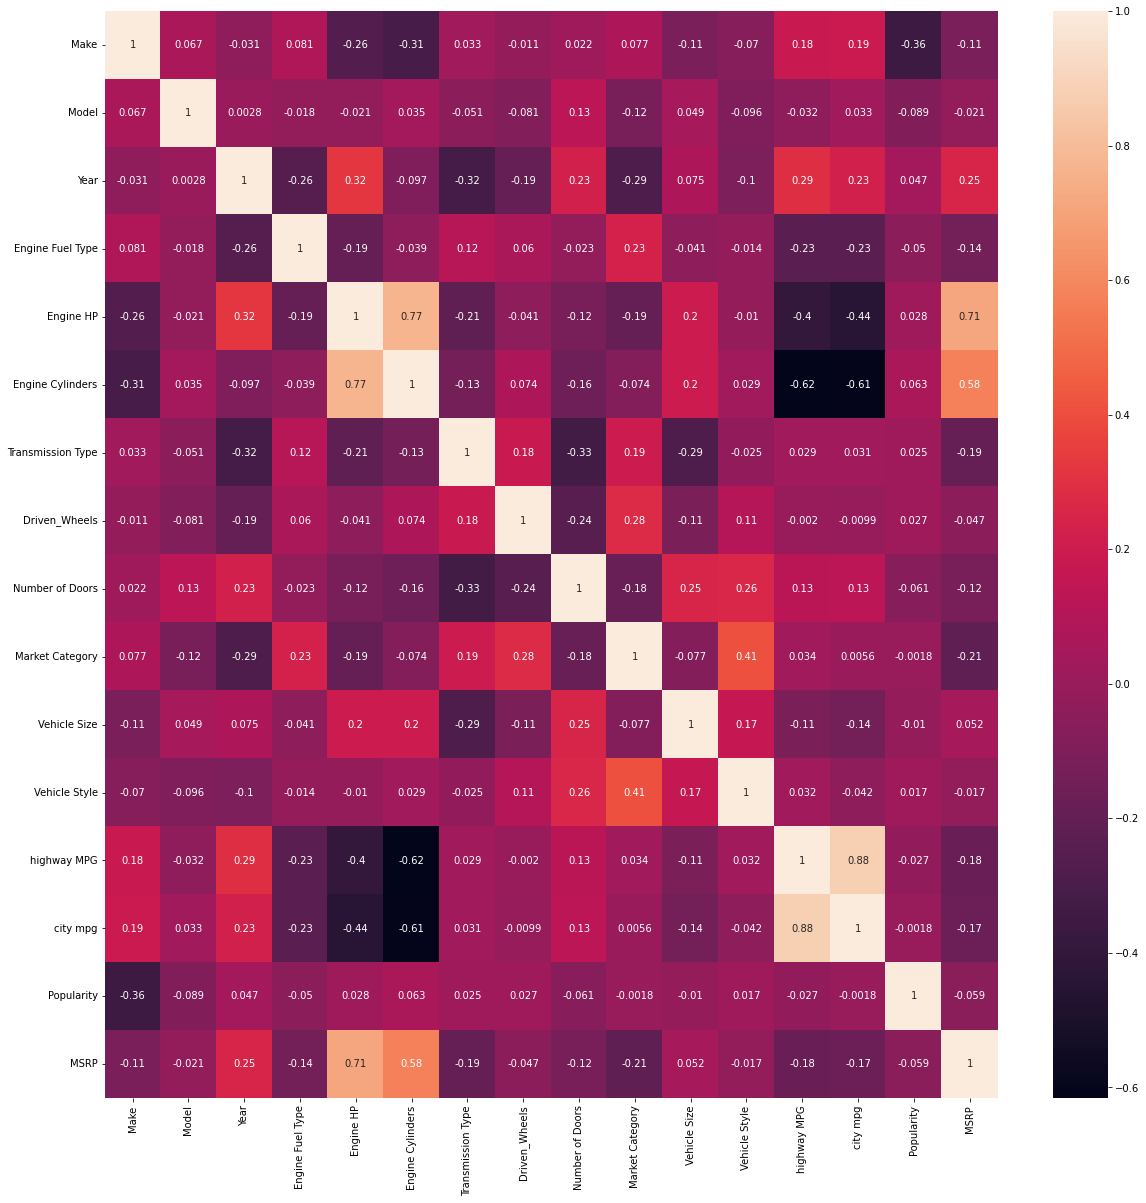

In [8]:
Corr_Values=Data.corr()
plt.figure(figsize=(20,20))
sb.heatmap(Corr_Values,annot=True)

In [9]:
Data_1=Data.drop(['Make','Model','Engine Fuel Type','Driven_Wheels','Number of Doors','Vehicle Size','Vehicle Style','Popularity'],axis=1)

In [10]:
Data_n=Data_1.dropna()
Data_n.isnull().sum()

Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Market Category      0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

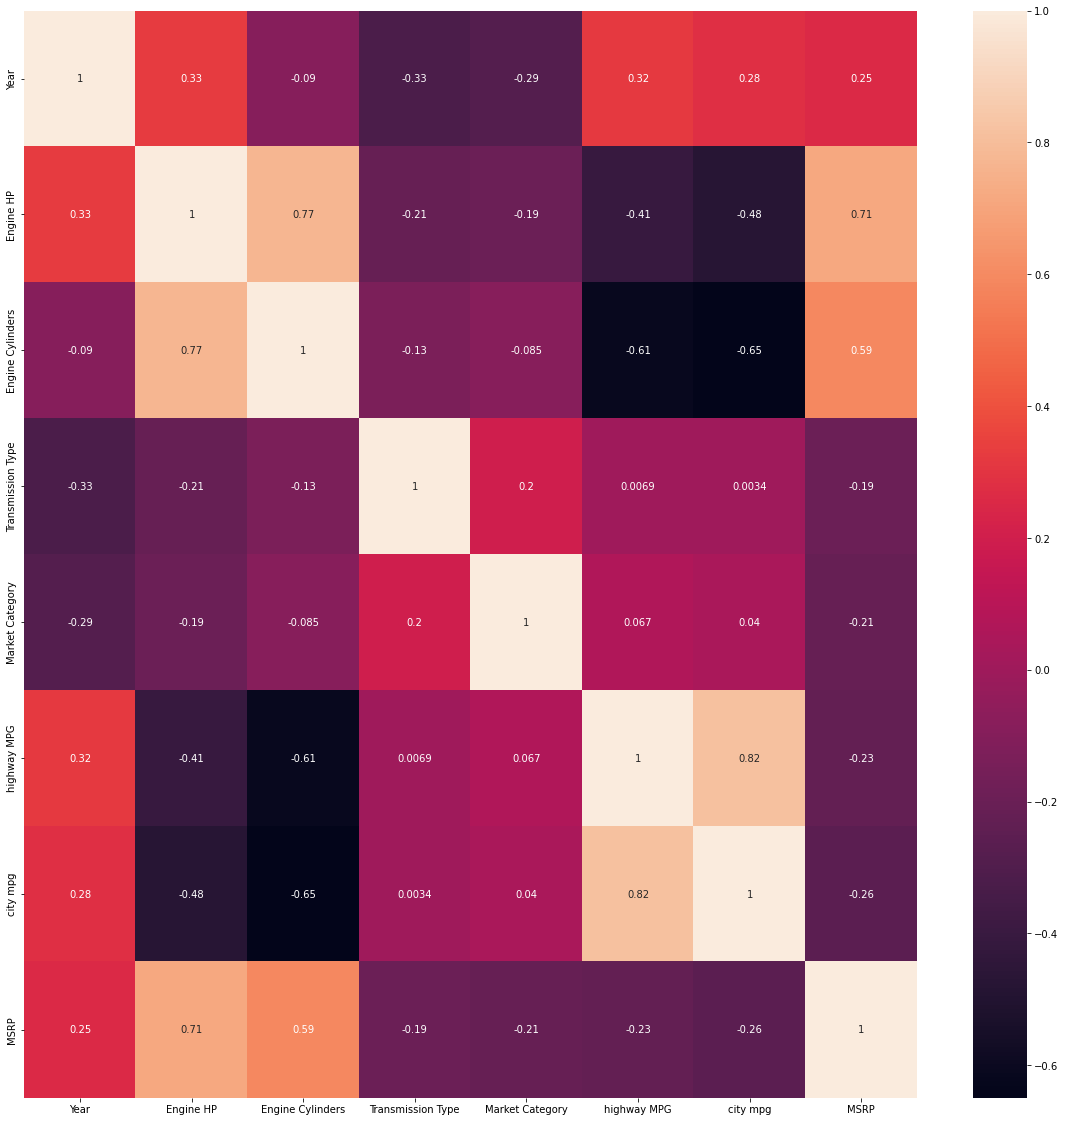

In [11]:
Corr_Values_n=Data_n.corr()
plt.figure(figsize=(20,20))
sb.heatmap(Corr_Values_n,annot=True)

6


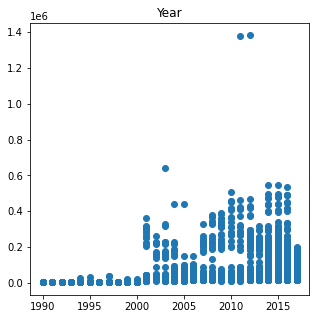

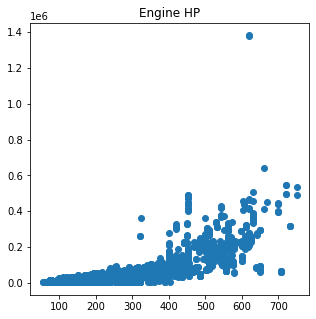

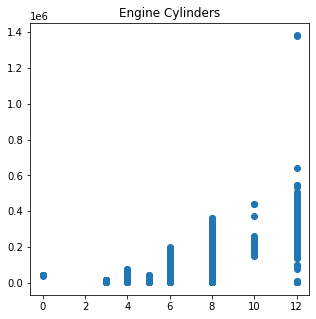

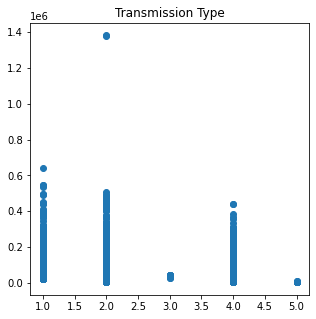

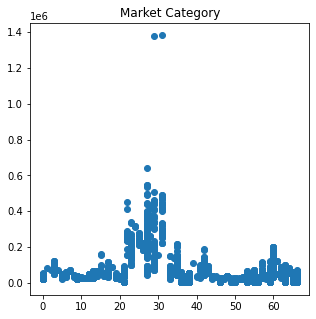

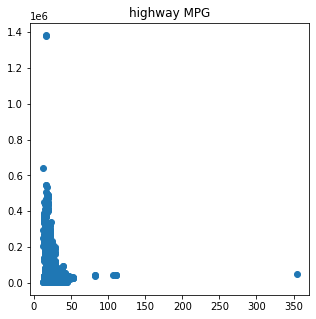

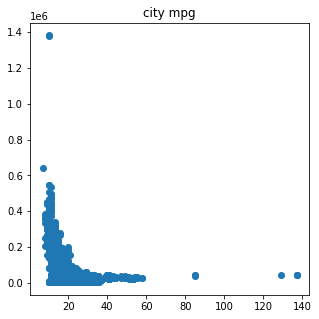

In [12]:
for i in range(len(Data_n.iloc[0,:])-1):
    plt.figure(figsize=(5,5))
    plt.title(Data_n.columns[i])
    plt.scatter(Data_n.iloc[:,i],Data_n.iloc[:,-1])
print(i)

In [13]:
X=Data_n.iloc[:,0:-1]
y=Data_n.iloc[:,-1]

X_train=X.sample(frac=0.6,random_state=1)
X_test=X.drop(X_train.index)
X_valid=X_test.sample(frac=0.5,random_state=1)
X_test=X_test.drop(X_valid.index)

y_train=y.sample(frac=0.6,random_state=1)
y_test=y.drop(y_train.index)
y_valid=y_test.sample(frac=0.5,random_state=1)
y_test=y_test.drop(y_valid.index)

In [14]:
from sklearn.preprocessing import MinMaxScaler
#min max scaling the variables
scaler =  MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)
X_train_scaled.head()

AttributeError: ignored

In [ ]:
y_train.head()

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
model = Sequential()
L=len(X.iloc[0])
model.add(Dense(L+1, input_shape=(L,), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=500)

In [ ]:
y_pred_valid = model.predict(X_valid_scaled)
MSE=mean_squared_error(y_train['target'], y_train_rf)
COD=r2_score(y_train['target'], y_train_rf)
print('Mean squared error for testing set: %.2f'%MSE)
print('Coefficient of determination for testing set: %.2f'%COD)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test.head()

In [ ]:
Output=X_test.merge(y_test, how='inner', left_index=True, right_index=True).merge(pd.DataFrame(y_pred), how='inner', left_index=True, right_index=True)
Output.head()